In [1]:
# csv file
#datafile = "deep1B_f2_apu-3_cpu-512GB_gpu-GEFORCERTXTI.csv"
datafile = "deep1B_results_1628703727.8284457.csv"

In [3]:
import pandas as pd
df = pd.read_csv(datafile)

apu = df[ df['device']=='apu'] 
apu__qs_10000 = apu[ apu['query_set_size']==10000 ] 
apu__qs_10000__k_10 = apu__qs_10000[ apu__qs_10000['k']==10 ]
print(apu__qs_10000__k_10)

cpu = df[ df['device']=='cpu'] 
cpu__qs_10000 = cpu[ cpu['query_set_size']==10000 ] 
cpu__qs_10000__k_10 = cpu__qs_10000[ cpu__qs_10000['k']==10 ]
print(cpu__qs_10000__k_10)

gpu = df[ df['device']=='gpu'] 
gpu__qs_10000 = gpu[ gpu['query_set_size']==10000 ] 
gpu__qs_10000__k_10 = gpu__qs_10000[ gpu__qs_10000['k']==10 ]
print(gpu__qs_10000__k_10)

  device  query_set_size   k  params    latency  recall
4    apu           10000  10      -1  69.897987  0.9419
   device  query_set_size   k  params    latency   recall
41    cpu           10000  10      32  13.743808  0.86323
42    cpu           10000  10      40   6.562980  0.34045
43    cpu           10000  10      50  48.109635  0.97718
44    cpu           10000  10      60  13.791327  0.94746
   device  query_set_size   k  params    latency   recall
21    gpu           10000  10      32   2.635948  0.86323
22    gpu           10000  10      40   0.329789  0.34045
23    gpu           10000  10      50  46.703006  0.97718
24    gpu           10000  10      60   6.732052  0.94746


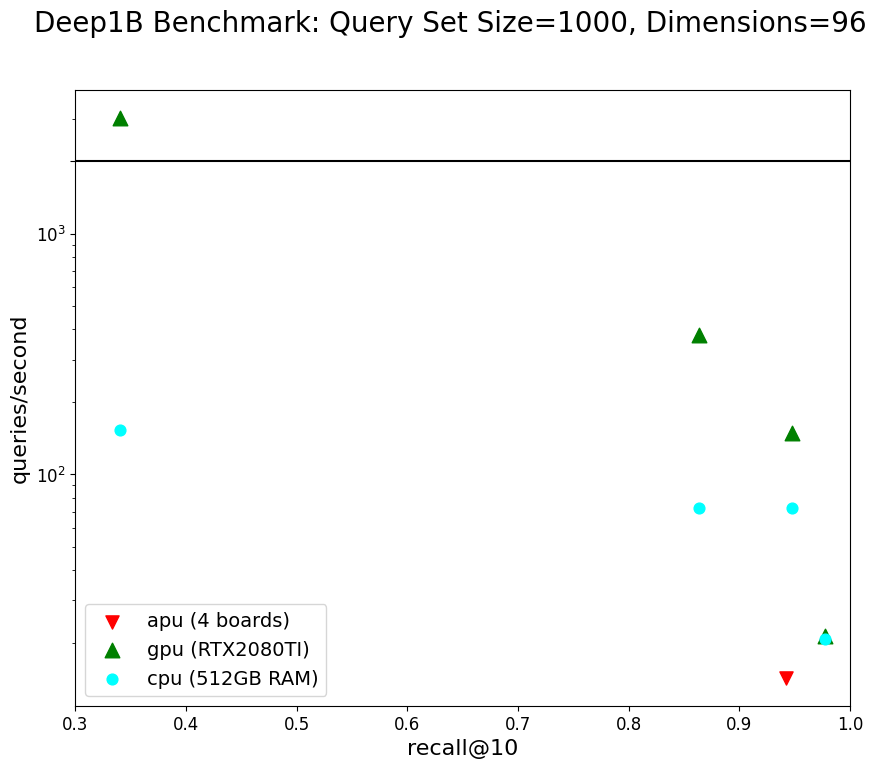

In [17]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('axes', labelsize=16, titlesize=16)
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["figure.titlesize"] = 14
plt.rcParams["figure.titleweight"] = 'roman'
#print(plt.rcParams.keys())

apu_latency = apu__qs_10000__k_10['latency'].tolist()
apu_qps = [ 1000/l for l in apu_latency]
apu_recall = apu__qs_10000__k_10['recall'].tolist()

cpu_latency = cpu__qs_10000__k_10['latency'].tolist()
cpu_qps = [ 1000/l for l in cpu_latency]
cpu_recall = cpu__qs_10000__k_10['recall'].tolist()

gpu_latency = gpu__qs_10000__k_10['latency'].tolist()
gpu_qps = [ 1000/l for l in gpu_latency]
gpu_recall = gpu__qs_10000__k_10['recall'].tolist()

plt.scatter( apu_recall, apu_qps, 
             marker = 'v', s=90,
                 color=['red' for i in range(len(apu_latency))])
plt.scatter( gpu_recall, gpu_qps, 
             marker = '^', s=110,
                color=['green' for i in range(len(apu_latency))])
plt.scatter( cpu_recall, cpu_qps, 
            marker = 'o', s=60,
                color=['cyan' for i in range(len(apu_latency))])
plt.hlines(2000,xmin=0.3,xmax=1.0,colors=['black'])

plt.yscale('log')
plt.yticks([100,1000,2000])
plt.ylabel('queries/second')
plt.xlim([0.3, 1.0])
plt.xlabel('recall@10')

plt.legend(['apu (4 boards)','gpu (RTX2080TI)', 'cpu (512GB RAM)'],fontsize=14,loc="lower left")

plt.suptitle('Deep1B Benchmark: Query Set Size=1000, Dimensions=96', fontsize=20)
plt.show()
fig = plt.gcf()
fig.patch.set_alpha(1)
fig.savefig("deep1B_compare.png",facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)